In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from GDAnalysisAC import LinDiscAnalysis
from GDAnalysisAC import utilsAC

In [67]:
def pipeline(X, y):
    train_x, train_y, test_x, test_y = utilsAC.splitTrainTest(X, y, train_ratio=0.7)
    train_x, train_min, train_max = utilsAC.normMinMax(train_x, mode='train')
    test_x = utilsAC.normMinMax(test_x, mode='test', train_min=train_min, train_max=train_max)

    lda_ac = LinDiscAnalysis()
    lda_ac.fit(train_x, train_y)
    pred = lda_ac.predict(test_x)
    pf = utilsAC.get_performance_measure(test_y, pred)
    print(f'Performance Measures: {pf}\n')
    print(f'Trained weights: {lda_ac.get_params()}\n')
    utilsAC.plot_dec_bound(X, y, lda_ac.get_params())
    # pred_prob = lda_ac.predict(test_x, prob=True)
    # thresh = np.arange(-1, 1, 0.001)
    # utilsAC.plot_roc(test_y, pred_prob, thresh=thresh)

## Data 1 (Binary LDA)

In [68]:
data1 = pd.read_csv('data1.csv', header=None)
data1.head()

,0,1,2
0,-0.69736,-3.6535,1
1,-4.82200,-7.6336,1
2,-8.23430,-7.5536,1
3,-6.07640,-11.3800,1
4,-10.73600,-14.3760,1


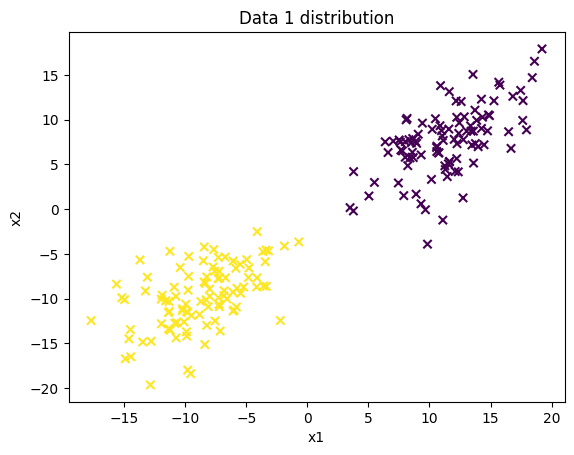

In [69]:
plt.scatter(data1[0], data1[1], marker='x', c=data1[2])
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Data 1 distribution')
plt.show()

In [70]:
data1_x = data1.iloc[:, :-1]
data1_y = data1.iloc[:, -1]

data1_y.value_counts()

2
1    100
0    100
Name: count, dtype: int64

Performance Measures: {'tp': 31, 'tn': 29, 'fp': 0, 'fn': 0, 'precision': 1.0, 'recall': 1.0, 'spec': 1.0, 'f1': 1.0}

Trained weights: [ 3.21580067 -4.90879441 -1.68433538]



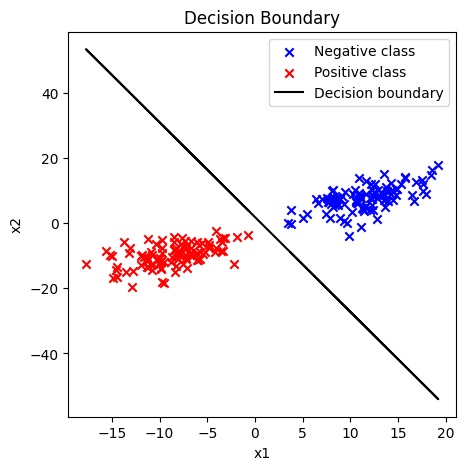

In [71]:
pipeline(data1_x, data1_y)

## Data 2 - Heart Disease Dataset (Binary LDA)

In [72]:
data2 = pd.read_csv('heart.csv')
data2.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [73]:
data2_x = data2.iloc[:, :-1]
data2_y = data2.iloc[:, -1]

data2_y.value_counts()

target
1    526
0    499
Name: count, dtype: int64

In [74]:
pipeline(data2_x, data2_y)

Performance Measures: {'tp': 137, 'tn': 115, 'fp': 43, 'fn': 13, 'precision': 0.7611111111111111, 'recall': 0.9133333333333333, 'spec': 0.7278481012658228, 'f1': 0.8303030303030302}

Trained weights: [ 1.36824415 -0.36033837 -0.90268606  1.31138189 -0.89046281 -0.73760089
 -0.07076988  0.13243171  1.57368155 -0.60222137 -1.30451502  0.72763144
 -1.48935086 -1.40613641]

Facility to plot decision boundary for data with more than 3 features has not been added yet!


## Data 3 (Multiclass LDA)

In [75]:
data3 = pd.read_csv('data5.csv', header=None)
print(data3.iloc[:, -1].value_counts())
data3.head()

3
1    100
2    100
3    100
Name: count, dtype: int64


,0,1,2,3
0,-6.2213,2.8432,10.5470,1
1,-14.9730,-6.4275,3.8337,1
2,-5.9850,-3.9402,11.9860,1
3,-6.8994,1.8714,11.2250,1
4,-4.8246,4.9447,17.2610,1


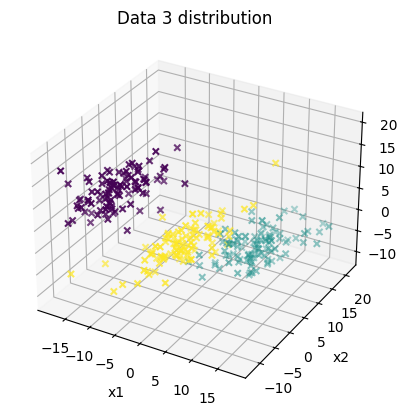

In [76]:
ax = plt.axes(projection='3d')
ax.scatter3D(data3.iloc[:, 0], data3.iloc[:, 1], data3.iloc[:, 2], c=data3.iloc[:, 3], marker='x')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('x3')
plt.title('Data 3 distribution')
plt.show()

In [77]:
data3_x = data3.iloc[:, :-1]
data3_y = data3.iloc[:, -1]

Performance Measures: {'acc': 0.9333333333333333}

Trained weights: {1: array([-15.2311791 ,  25.85035529,   2.4392092 ,  26.66923133]), 2: array([-15.72289185,  29.21505956,   5.09394928,  22.10726696]), 3: array([-12.93084606,  35.17715324,  -6.18814929,  21.6593199 ])}



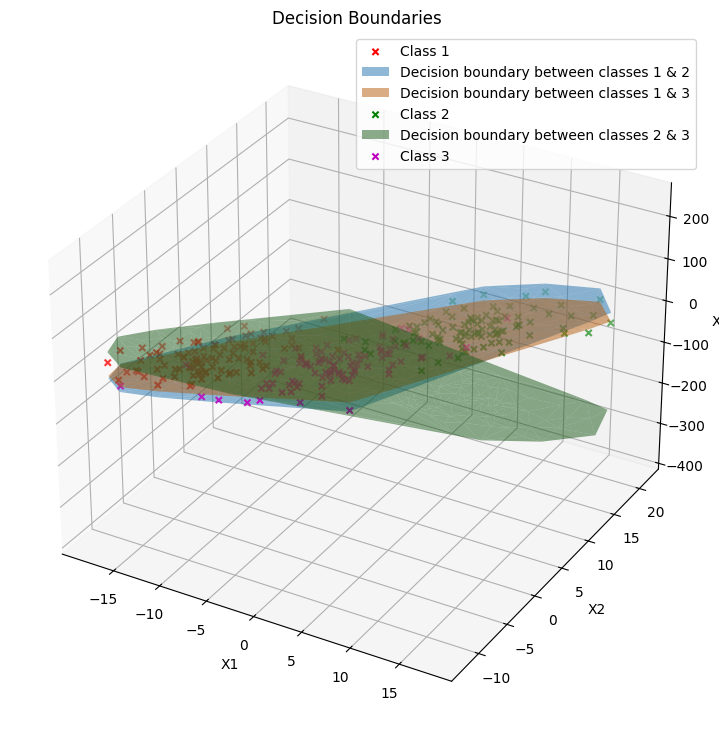

In [78]:
pipeline(data3_x, data3_y)